In [1]:
#Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.4f}'.format
%matplotlib inline
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
#The CSV file is imported using the read_csv command given below:
cardf = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
#The first ten rows of the loan Dataframe are displayed below:
cardf.head(10)

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6000,...,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,"13,495.0000"
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6000,...,130,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,"16,500.0000"
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5000,...,152,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,"16,500.0000"
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8000,...,109,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,"13,950.0000"
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4000,...,136,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,"17,450.0000"
5,6,2,audi fox,gas,std,two,sedan,fwd,front,99.8000,...,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,"15,250.0000"
6,7,1,audi 100ls,gas,std,four,sedan,fwd,front,105.8000,...,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,"17,710.0000"
7,8,1,audi 5000,gas,std,four,wagon,fwd,front,105.8000,...,136,mpfi,3.1900,3.4000,8.5000,110,5500,19,25,"18,920.0000"
8,9,1,audi 4000,gas,turbo,four,sedan,fwd,front,105.8000,...,131,mpfi,3.1300,3.4000,8.3000,140,5500,17,20,"23,875.0000"
9,10,0,audi 5000s (diesel),gas,turbo,two,hatchback,4wd,front,99.5000,...,131,mpfi,3.1300,3.4000,7.0000,160,5500,16,22,"17,859.1670"


In [4]:
#The DataFrame is analysed using the below commands. 
print(cardf.shape)
print(cardf.info())

(205, 26)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
pea

# The percentage of missing values in the loan dataframe is calculated below

In [5]:
round(100*(cardf.isnull().sum()/len(cardf.index)),2)

car_ID             0.0000
symboling          0.0000
CarName            0.0000
fueltype           0.0000
aspiration         0.0000
doornumber         0.0000
carbody            0.0000
drivewheel         0.0000
enginelocation     0.0000
wheelbase          0.0000
carlength          0.0000
carwidth           0.0000
carheight          0.0000
curbweight         0.0000
enginetype         0.0000
cylindernumber     0.0000
enginesize         0.0000
fuelsystem         0.0000
boreratio          0.0000
stroke             0.0000
compressionratio   0.0000
horsepower         0.0000
peakrpm            0.0000
citympg            0.0000
highwaympg         0.0000
price              0.0000
dtype: float64

# Data manupilation

In [6]:
#Data manupilation
#deriveing and saprating company name from car name

cardf["Company"]=cardf["CarName"].apply(lambda x:x.split(" ")[0])
#cardf["OnlyCarName"]=cardf["CarName"].apply(lambda x:"".join(x.split(" ")[1:]))
#converting symboling to str
cardf['symboling'] = cardf['symboling'].astype(str)

In [7]:
#Dropping columns not used in further analysis and cleaning the dataset
#droping car id and car name column
cardf=cardf.drop(['car_ID', 'CarName'], axis=1)
cardf.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company
0,3,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,...,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,"13,495.0000",alfa-romero
1,3,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,...,mpfi,3.4700,2.6800,9.0000,111,5000,21,27,"16,500.0000",alfa-romero
2,1,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,...,mpfi,2.6800,3.4700,9.0000,154,5000,19,26,"16,500.0000",alfa-romero
3,2,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,...,mpfi,3.1900,3.4000,10.0000,102,5500,24,30,"13,950.0000",audi
4,2,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,...,mpfi,3.1900,3.4000,8.0000,115,5500,18,22,"17,450.0000",audi


In [8]:
#createing derived column power to weight ratio "Po_We" from horsepower/curbweight
cardf["Po_We"]=cardf["horsepower"]/cardf["curbweight"]
#createing derived column car volume "car_vol" from car height lenght and width
cardf["car_vol"]=cardf["carlength"]*cardf["carwidth"]*cardf["carheight"]


cardf.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Company,Po_We,car_vol
0,3,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,...,2.6800,9.0000,111,5000,21,27,"13,495.0000",alfa-romero,0.0436,"528,019.9040"
1,3,gas,std,two,convertible,rwd,front,88.6000,168.8000,64.1000,...,2.6800,9.0000,111,5000,21,27,"16,500.0000",alfa-romero,0.0436,"528,019.9040"
2,1,gas,std,two,hatchback,rwd,front,94.5000,171.2000,65.5000,...,3.4700,9.0000,154,5000,19,26,"16,500.0000",alfa-romero,0.0546,"587,592.6400"
3,2,gas,std,four,sedan,fwd,front,99.8000,176.6000,66.2000,...,3.4000,10.0000,102,5500,24,30,"13,950.0000",audi,0.0436,"634,816.9560"
4,2,gas,std,four,sedan,4wd,front,99.4000,176.6000,66.4000,...,3.4000,8.0000,115,5500,18,22,"17,450.0000",audi,0.0407,"636,734.8320"


In [9]:
#createing dummy columns
#dealing with catogoraial data
cardf_cat=pd.get_dummies(cardf, drop_first=True, dtype=int)
print(cardf_cat.columns.values)
cardf_cat.tail(20)


['wheelbase' 'carlength' 'carwidth' 'carheight' 'curbweight' 'enginesize'
 'boreratio' 'stroke' 'compressionratio' 'horsepower' 'peakrpm' 'citympg'
 'highwaympg' 'price' 'Po_We' 'car_vol' 'symboling_-2' 'symboling_0'
 'symboling_1' 'symboling_2' 'symboling_3' 'fueltype_gas'
 'aspiration_turbo' 'doornumber_two' 'carbody_hardtop' 'carbody_hatchback'
 'carbody_sedan' 'carbody_wagon' 'drivewheel_fwd' 'drivewheel_rwd'
 'enginelocation_rear' 'enginetype_dohcv' 'enginetype_l' 'enginetype_ohc'
 'enginetype_ohcf' 'enginetype_ohcv' 'enginetype_rotor'
 'cylindernumber_five' 'cylindernumber_four' 'cylindernumber_six'
 'cylindernumber_three' 'cylindernumber_twelve' 'cylindernumber_two'
 'fuelsystem_2bbl' 'fuelsystem_4bbl' 'fuelsystem_idi' 'fuelsystem_mfi'
 'fuelsystem_mpfi' 'fuelsystem_spdi' 'fuelsystem_spfi'
 'Company_alfa-romero' 'Company_audi' 'Company_bmw' 'Company_buick'
 'Company_chevrolet' 'Company_dodge' 'Company_honda' 'Company_isuzu'
 'Company_jaguar' 'Company_maxda' 'Company_mazda' 'Comp

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,Company_porsche,Company_renault,Company_saab,Company_subaru,Company_toyota,Company_toyouta,Company_vokswagen,Company_volkswagen,Company_volvo,Company_vw
185,97.3000,171.7000,65.5000,55.7000,2212,109,3.1900,3.4000,9.0000,85,...,0,0,0,0,0,0,0,1,0,0
186,97.3000,171.7000,65.5000,55.7000,2275,109,3.1900,3.4000,9.0000,85,...,0,0,0,0,0,0,0,1,0,0
187,97.3000,171.7000,65.5000,55.7000,2319,97,3.0100,3.4000,23.0000,68,...,0,0,0,0,0,0,0,1,0,0
188,97.3000,171.7000,65.5000,55.7000,2300,109,3.1900,3.4000,10.0000,100,...,0,0,0,0,0,0,0,1,0,0
189,94.5000,159.3000,64.2000,55.6000,2254,109,3.1900,3.4000,8.5000,90,...,0,0,0,0,0,0,0,0,0,1
190,94.5000,165.7000,64.0000,51.4000,2221,109,3.1900,3.4000,8.5000,90,...,0,0,0,0,0,0,0,0,0,1
191,100.4000,180.2000,66.9000,55.1000,2661,136,3.1900,3.4000,8.5000,110,...,0,0,0,0,0,0,0,1,0,0
192,100.4000,180.2000,66.9000,55.1000,2579,97,3.0100,3.4000,23.0000,68,...,0,0,0,0,0,0,0,1,0,0
193,100.4000,183.1000,66.9000,55.1000,2563,109,3.1900,3.4000,9.0000,88,...,0,0,0,0,0,0,0,1,0,0
194,104.3000,188.8000,67.2000,56.2000,2912,141,3.7800,3.1500,9.5000,114,...,0,0,0,0,0,0,0,0,1,0


## Data Modeling
as the features are more we will first use RFE to narrow our approch

## Splitting the Data into Training and Testing Sets

In [10]:

from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(cardf_cat, train_size = 0.7, test_size = 0.3, random_state = 100)


In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['wheelbase', 'carlength', 'carwidth' ,'carheight', 'curbweight' ,'enginesize', 'boreratio', 'stroke' ,'compressionratio' ,'horsepower' ,'peakrpm', 'citympg', 'highwaympg' ,'price', 'Po_We' ,'car_vol']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()
y_train = df_train.pop('price')
X_train = df_train

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


### RFE
Recursive feature elimination

In [12]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
# Running RFE with the output number of the variable equal to 40
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,40)             # running RFE
rfe = rfe.fit(X_train, y_train)
(list(zip(X_train.columns,rfe.support_,rfe.ranking_)))
X_col=X_train.columns[rfe.support_]
X_col


Index(['wheelbase', 'carlength', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'horsepower', 'peakrpm', 'Po_We', 'car_vol',
       'symboling_-2', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_4bbl', 'Company_bmw', 'Company_chevrolet', 'Company_dodge',
       'Company_honda', 'Company_jaguar', 'Company_mitsubishi',
       'Company_peugeot', 'Company_plymouth', 'Company_porsche',
       'Company_renault', 'Company_saab', 'Company_subaru', 'Company_volvo'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [13]:
y=y_train
X = X_train[X_col]

X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     108.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.54e-68
Time:                        20:54:37   Log-Likelihood:                 279.60
No. Observations:                 143   AIC:                            -483.2
Df Residuals:                     105   BIC:                            -370.6
Df Model:                          37                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.11

# we will have to remove columns with p>.05 in one by one fashion

In [14]:
#removing columns with p>.05
#Company_jaguar 
X_col=['wheelbase', 'carlength', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'horsepower', 'peakrpm', 'Po_We', 'car_vol',
       'symboling_-2', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_4bbl', 'Company_bmw', 'Company_chevrolet', 'Company_dodge',
       'Company_honda',  'Company_mitsubishi',
       'Company_peugeot', 'Company_plymouth', 'Company_porsche',
       'Company_renault', 'Company_saab', 'Company_subaru', 'Company_volvo']

X = X_train[X_col]

X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     110.0
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           5.71e-69
Time:                        20:54:37   Log-Likelihood:                 277.72
No. Observations:                 143   AIC:                            -481.4
Df Residuals:                     106   BIC:                            -371.8
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [15]:
#removing columns with p>.05
#curbweight                
X_col=['wheelbase', 'carlength', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'horsepower', 'peakrpm', 'Po_We', 'car_vol',
       'symboling_-2', 'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_4bbl', 'Company_bmw', 'Company_chevrolet', 'Company_dodge',
       'Company_honda',  'Company_mitsubishi',
       'Company_peugeot', 'Company_plymouth', 'Company_porsche',
       'Company_renault', 'Company_saab', 'Company_subaru', 'Company_volvo']

X = X_train[X_col]

X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     113.7
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           6.75e-70
Time:                        20:54:37   Log-Likelihood:                 277.39
No. Observations:                 143   AIC:                            -482.8
Df Residuals:                     107   BIC:                            -376.1
Df Model:                          35                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.12

In [16]:
#removing columns with p>.05
#'symboling_-2'                
X_col=['wheelbase', 'carlength', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'horsepower', 'peakrpm', 'Po_We', 'car_vol',
        'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_4bbl', 'Company_bmw', 'Company_chevrolet', 'Company_dodge',
       'Company_honda',  'Company_mitsubishi',
       'Company_peugeot', 'Company_plymouth', 'Company_porsche',
       'Company_renault', 'Company_saab', 'Company_subaru', 'Company_volvo']


X = X_train[X_col]

X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.965
Method:                 Least Squares   F-statistic:                     114.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           2.78e-70
Time:                        20:54:38   Log-Likelihood:                 275.38
No. Observations:                 143   AIC:                            -480.8
Df Residuals:                     108   BIC:                            -377.1
Df Model:                          34                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [17]:
#removing columns with p>.05
#Company_renault                        
X_col=['wheelbase', 'carlength', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'horsepower', 'peakrpm', 'Po_We', 'car_vol',
        'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_4bbl', 'Company_bmw', 'Company_chevrolet', 'Company_dodge',
       'Company_honda',  'Company_mitsubishi',
       'Company_peugeot', 'Company_plymouth', 'Company_porsche',
        'Company_saab', 'Company_subaru', 'Company_volvo']


X = X_train[X_col]

X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     117.8
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           4.93e-71
Time:                        20:54:38   Log-Likelihood:                 274.49
No. Observations:                 143   AIC:                            -481.0
Df Residuals:                     109   BIC:                            -380.2
Df Model:                          33                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.15

In [18]:
#removing columns with p>.05
#fuelsystem_4bbl                                  
X_col=['wheelbase', 'carlength', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'horsepower', 'peakrpm', 'Po_We', 'car_vol',
        'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
        'Company_bmw', 'Company_chevrolet', 'Company_dodge',
       'Company_honda',  'Company_mitsubishi',
       'Company_peugeot', 'Company_plymouth', 'Company_porsche',
        'Company_saab', 'Company_subaru', 'Company_volvo']


X = X_train[X_col]

X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     121.1
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           8.66e-72
Time:                        20:54:38   Log-Likelihood:                 273.60
No. Observations:                 143   AIC:                            -481.2
Df Residuals:                     110   BIC:                            -383.4
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.14

In [19]:
#removing columns with p>.05
#Company_chevrolet                                  
X_col=['wheelbase', 'carlength', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'horsepower', 'peakrpm', 'Po_We', 'car_vol',
        'aspiration_turbo', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
        'Company_bmw',  'Company_dodge',
       'Company_honda',  'Company_mitsubishi',
       'Company_peugeot', 'Company_plymouth', 'Company_porsche',
        'Company_saab', 'Company_subaru', 'Company_volvo']


X = X_train[X_col]

X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.972
Model:                            OLS   Adj. R-squared:                  0.964
Method:                 Least Squares   F-statistic:                     122.9
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.02e-72
Time:                        20:54:38   Log-Likelihood:                 271.82
No. Observations:                 143   AIC:                            -479.6
Df Residuals:                     111   BIC:                            -384.8
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [20]:
#removing columns with p>.05
#carbody_wagon ,carbody_hardtop       carbody_sedan                                      
X_col=['wheelbase', 'carlength', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'horsepower', 'peakrpm', 'Po_We', 'car_vol',
        'aspiration_turbo',
       'carbody_hatchback', 
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
        'Company_bmw',  'Company_dodge',
       'Company_honda',  'Company_mitsubishi',
       'Company_peugeot', 'Company_plymouth', 'Company_porsche',
        'Company_saab', 'Company_subaru', 'Company_volvo']


X = X_train[X_col]

X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     132.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.81e-74
Time:                        20:54:38   Log-Likelihood:                 268.02
No. Observations:                 143   AIC:                            -478.0
Df Residuals:                     114   BIC:                            -392.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

## all p are now  p<.05

## WE now check VIP are remove values with greater than 5 one by one

In [21]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [22]:
# removeing columns with VIP >5

#enginetype_ohcf
X_col=['wheelbase', 'carlength', 'carheight', 'enginesize',
       'boreratio', 'stroke', 'horsepower', 'peakrpm', 'Po_We', 'car_vol',
        'aspiration_turbo',
       'carbody_hatchback', 
       'enginelocation_rear', 'enginetype_l', 'enginetype_ohcf',
       'enginetype_rotor', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
        'Company_bmw',  'Company_dodge',
       'Company_honda',  'Company_mitsubishi',
       'Company_peugeot', 'Company_plymouth', 'Company_porsche',
        'Company_saab', 'Company_subaru', 'Company_volvo']

X = X_train[X_col]

X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

#calculating vif
X = X.drop(['const'], axis=1)
# Calculate the VIFs for the new model


vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     132.3
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           3.81e-74
Time:                        20:54:38   Log-Likelihood:                 268.02
No. Observations:                 143   AIC:                            -478.0
Df Residuals:                     114   BIC:                            -392.1
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.08

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,Features,VIF
15,enginetype_rotor,inf
29,Company_subaru,inf
25,Company_peugeot,inf
20,cylindernumber_two,inf
18,cylindernumber_three,inf
12,enginelocation_rear,inf
13,enginetype_l,inf
14,enginetype_ohcf,inf
9,car_vol,438.2600
1,carlength,318.8100


## we will remove all inf variables

In [23]:
# removeing columns with VIP >5

#enginetype_rotor,'Company_subaru','Company_peugeot', 'car_vol',Company_honda 'horsepower', 'carlength','peakrpm',
X_col=['enginesize',        
        'aspiration_turbo',
       'carbody_hatchback', 
         'cylindernumber_five',
       'cylindernumber_twelve', 'cylindernumber_two',
        'Company_bmw',   'Company_mitsubishi',
         'Company_porsche',
        'Company_saab',  'Company_volvo']

X = X_train[X_col]

X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

#calculating vif
X = X.drop(['const'], axis=1)
# Calculate the VIFs for the new model


vif = pd.DataFrame()

vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     118.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.77e-62
Time:                        20:54:38   Log-Likelihood:                 188.12
No. Observations:                 143   AIC:                            -352.2
Df Residuals:                     131   BIC:                            -316.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

,Features,VIF
0,enginesize,2.1600
1,aspiration_turbo,1.5300
2,carbody_hatchback,1.4800
3,cylindernumber_five,1.2400
7,Company_mitsubishi,1.2200
6,Company_bmw,1.1900
4,cylindernumber_twelve,1.1800
10,Company_volvo,1.1500
5,cylindernumber_two,1.1100
8,Company_porsche,1.1100


In [24]:
# removeing columns with VIP >5

X_col=['enginesize','aspiration_turbo','carbody_hatchback','cylindernumber_five','cylindernumber_twelve', 'cylindernumber_two',
        'Company_bmw','Company_mitsubishi','Company_porsche','Company_saab','Company_volvo']



X = X_train[X_col]

X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y,X).fit()
print(lm_2.summary())

#calculating vif
X_next = X.drop(['const'], axis=1)
# Calculate the VIFs for the new model


vif = pd.DataFrame()

vif['Features'] = X_next.columns
vif['VIF'] = [variance_inflation_factor(X_next.values, i) for i in range(X_next.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.909
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     118.6
Date:                Sun, 27 Jan 2019   Prob (F-statistic):           1.77e-62
Time:                        20:54:39   Log-Likelihood:                 188.12
No. Observations:                 143   AIC:                            -352.2
Df Residuals:                     131   BIC:                            -316.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -0.08

,Features,VIF
0,enginesize,2.1600
1,aspiration_turbo,1.5300
2,carbody_hatchback,1.4800
3,cylindernumber_five,1.2400
7,Company_mitsubishi,1.2200
6,Company_bmw,1.1900
4,cylindernumber_twelve,1.1800
10,Company_volvo,1.1500
5,cylindernumber_two,1.1100
8,Company_porsche,1.1100


## All features have VIF <5 and p<.05 with r2 value .909

# Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

Text(0.5,0,'Errors')

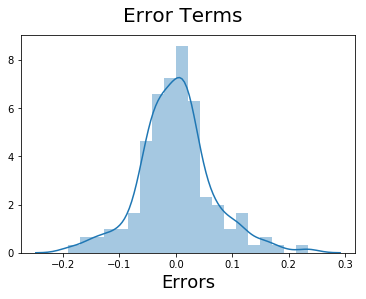

In [25]:
X_price = lm_2.predict(X)
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y - X_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Error are normally distibuted and are mean is 0

# Model Evaluation

In [26]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
X_col=['enginesize','aspiration_turbo','carbody_hatchback','cylindernumber_five','cylindernumber_twelve', 'cylindernumber_two',
        'Company_bmw','Company_mitsubishi','Company_porsche','Company_saab','Company_volvo','price']

 

df_train, df_test = train_test_split(cardf_cat[X_col], train_size = 0.7, test_size = 0.3, random_state = 100)

In [27]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
num_vars = ['enginesize','price']#,'carheight','boreratio', 'stroke','wheelbase','peakrpm' ]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()
df_train.head()
y_train = df_train.pop('price')
X_train = df_train

In [28]:
X_col_noprice=['enginesize','aspiration_turbo','carbody_hatchback','cylindernumber_five','cylindernumber_twelve', 'cylindernumber_two',
        'Company_bmw','Company_mitsubishi','Company_porsche','Company_saab','Company_volvo']


X = X_train[X_col_noprice]



X = sm.add_constant(X)
# create a fitted model in one line
lm_2 = sm.OLS(y_train,X).fit()




df_test[num_vars] = scaler.transform(df_test[num_vars])
y_test = df_test.pop('price')
X_test = df_test
X_test_new = sm.add_constant(X_test)
# Making predictions
y_pred = lm_2.predict(X_test_new)

Text(0,0.5,'y_pred')

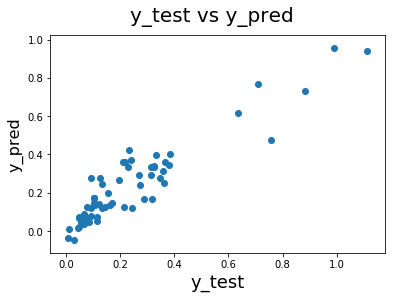

In [29]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)     

In [30]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.8631825295801757

## r2_score is .863

### Our model shows that the important feature we can use to predict the price are as follows
### 1)enginesize
### 2)aspiration_turbo
### 3)carbody_hatchback
### 4)enginelocation_rear
### 5)enginetype_rotor
### 6)cylindernumber_five
### 7)Company_bmw
### 8)Company_porsche
### 9)Company_buick
enginesize,aspiration_turbo,carbody_hatchback,enginelocation_rear,enginetype_rotor,cylindernumber_five,,Company_bmw,Company_porsche,Company_buick